This is Homework assignment 5 for Math460 by Marcel Lemery.

In [77]:
import numpy as np
import pandas as pd

In [78]:
import matplotlib.pyplot as plt #for the graphs
from sklearn.datasets import fetch_openml  # this allows for data to downloaded
from sklearn.neural_network import MLPClassifier

In [79]:
X, y = fetch_openml('mnist_784',version=1, return_X_y=True)

In [80]:
X.shape

(70000, 784)

In [81]:
y.shape

(70000,)

In [82]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X_print= np.array(X, dtype='uint8')

In [84]:
X_print

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [85]:
X_print[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [86]:
sample_image=X_print[12].reshape((28,28))

In [87]:
sample_image.shape

(28, 28)

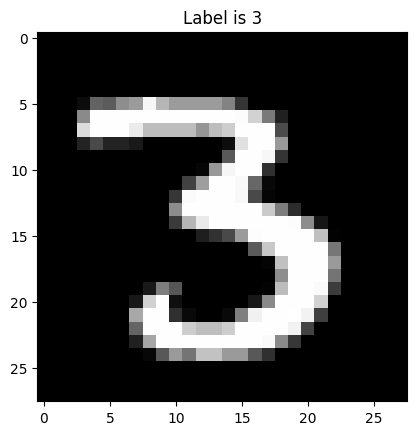

In [88]:
plt.title('Label is {}' .format(y[12])) #label for graph
plt.imshow(sample_image, cmap='gray') #creates the plot using sample_image as the image , cmap is a color map
plt.show() #show the plot

In [89]:
#scale data - there are 784 pixels - we will just divide each row by 784
X=X/784

In [90]:
#data frame to record results
results = pd.DataFrame(columns=['neurons','layers','Train time','Train Accuracy ','Test Accuracy'])

In [91]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3,random_state = 31415)

In [92]:
number=7
size=20
[size]*number

[20, 20, 20, 20, 20, 20, 20]

In [93]:
for number in [3,5]:
  for size in [10,20,30]:
    st = time() #records current time
    mlp = MLPClassifier(hidden_layer_sizes=[size]*number, max_iter=30, alpha=1e-4,
                      solver='sgd', verbose=10, random_state=31415, learning_rate_init=.1,activation='relu')
    warnings.filterwarnings("ignore")
    mlp.fit(X_train, y_train)
    end = time() - st #returns time to run model
    y_pred_test=mlp.predict(X_test)
    y_pred_train=mlp.predict(X_train)
    train_acc = metrics.accuracy_score(y_train,y_pred_train) # Train Accuracy
    test_acc = metrics.accuracy_score(y_test,y_pred_test) # Test Accuracy
    results.loc[1] = [size,number,end,train_acc,test_acc]

### you can modify the code above to run two nested for loop on `size` and `number `

Iteration 1, loss = 0.88106167
Iteration 2, loss = 0.31898138
Iteration 3, loss = 0.26295139
Iteration 4, loss = 0.24018523
Iteration 5, loss = 0.22547192
Iteration 6, loss = 0.21442963
Iteration 7, loss = 0.20537021
Iteration 8, loss = 0.19901373
Iteration 9, loss = 0.19384044
Iteration 10, loss = 0.19081708
Iteration 11, loss = 0.18785331
Iteration 12, loss = 0.18513354
Iteration 13, loss = 0.18174818
Iteration 14, loss = 0.18005934
Iteration 15, loss = 0.17850912
Iteration 16, loss = 0.17484930
Iteration 17, loss = 0.17333749
Iteration 18, loss = 0.17211516
Iteration 19, loss = 0.17144942
Iteration 20, loss = 0.17067407
Iteration 21, loss = 0.16767140
Iteration 22, loss = 0.16654122
Iteration 23, loss = 0.16671271
Iteration 24, loss = 0.16454513
Iteration 25, loss = 0.16523487
Iteration 26, loss = 0.16518584
Iteration 27, loss = 0.16283892
Iteration 28, loss = 0.16381873
Iteration 29, loss = 0.16346791
Iteration 30, loss = 0.16021473
Iteration 1, loss = 0.65199060
Iteration 2, loss 

In [94]:
results

,neurons,layers,Train time,Train Accuracy,Test Accuracy
1,30.0,5.0,55.718515,0.98898,0.965476


Multi-Layer Perceptrons
The Mnist dataset consists of 28 × 28 images of all 10 digits. You will need to flatten each digit into a 784-element array in order to use the data to train MLP models.

Starting by building and training a MLPClassifier model from sklearn.neural_network.

Experiment with the numbers of hidden layers (e.g. between 1 and 4 hidden layers) and the numbers of neurons in each layer. How do the training time and prediction accuracy of the model change with the different model architectures. Now build MLP models with the exact same architectures using tensorflow. tensorflow.keras contains several easy to use wrappers for building and training neural networks. You should focus on tensorflow.keras.Sequential for the model object and tensorflow.keras.layers.Dense for each layer object.

Hint: You can use the .summary() method on tensorflow model objects to see the model architecture.

How do the tensorflow models compare against the sklearn models? See if you can leverage a GPU in the Colab notebook. Does a GPU help with this model on this data? If so, what changes have you noticed?

Convolutional Models
Image data can be much better analyzed with Convolutional Networks. Since convolutional layers directly work with images, you will have to present the images from Mnist in the original 28 × 28 shape. Build a convolutional model using tensorflow. You will want to use the tensorflow.keras.ayers.Conv2d class to build each convolutional layer. If you decide to use multiple convolutional layers (which we recommend), you will also need to use a Pooling layer. Experiment with the MaxPool2D and AveragePooling2D layers and see how they change the architecture and perform in training.

In [95]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [96]:
#the original downloaded MNIST set might give you trouble for the remaining code. If so, download it using
mnist = tf.keras.datasets.mnist
# instead

In [97]:
#research what the parameters of the model are
#what do `activation` and `input_shape` do?
#what is the difference between `Conv2D` and `MaxPooling 2d` ?
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

input_shape here sets the dimensions of the images being modeled, which could be very large if we wanted a high-resolution image, but that would take a lot of computing power. Activiation determines what type of model you use. It could be relu, sigmoid, or maybe another type, but relu seems pretty effective. Conv2D is sort of used to calculated the value of each node in the neural network while maxpooling2D finds the maximal nodal value and filters to only that.

In [98]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [110]:
#build the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],run_eagerly=True)

In [111]:
(A_train, b_train), (A_test, b_test) = mnist.load_data()

In [112]:
#run the model
E=10 # this is the number of times the data is ran throught the model. This runs SLOOOOOOOW
history = model.fit(A_train,b_train, epochs=E,
                    validation_data=(A_test, b_test))

Epoch 1/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.1967 - accuracy: 0.9493 - val_loss: 0.0646 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0669 - accuracy: 0.9800 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 145s 78ms/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0612 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0430 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0387 - val_accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0

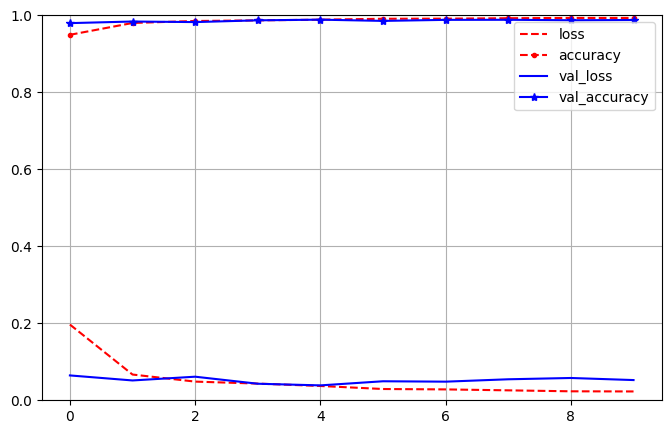

In [113]:
### plot of results
pd.DataFrame(history.history).plot(figsize=(8, 5), style=["r--", "r--.","b-","b-*"])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### create another plot to zoom in look for sign of overfitting

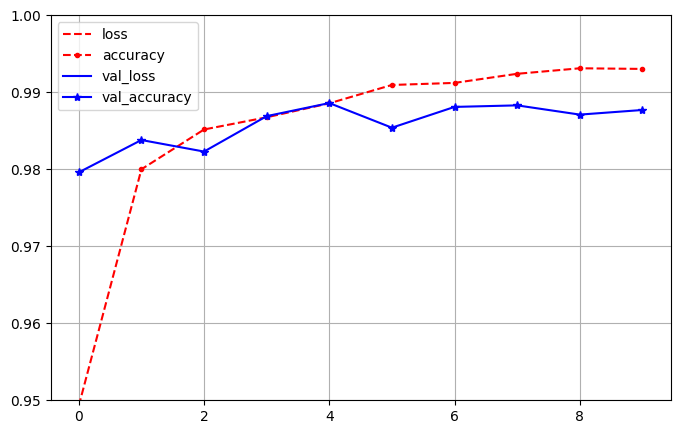

In [114]:
pd.DataFrame(history.history).plot(figsize=(8, 5), style=["r--", "r--.","b-","b-*"])
plt.grid(True)
plt.gca().set_ylim(0.95, 1)
plt.show()

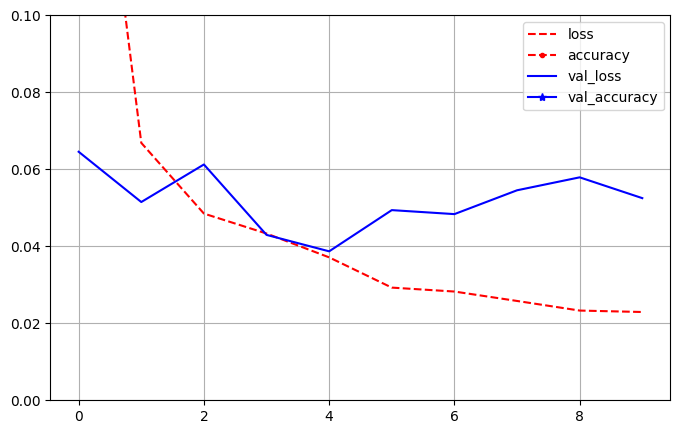

In [115]:
pd.DataFrame(history.history).plot(figsize=(8, 5), style=["r--", "r--.","b-","b-*"])
plt.grid(True)
plt.gca().set_ylim(0, 0.1)
plt.show()

Here we can see that val accuracy is highest at 4 while val loss is lowest at 4. Which seems to indicate that 5 epochs (counting starts at 0 on the first epoch) is the best fit for the model and anything beyond that gives an overfitted model.